# b.You will first train and validate your ANN on the toy problem of learning the mathematical function y = sin(x), where -2π <= x <= 2π. 

In [ ]:
import numpy as np

b1. Extract 1000 (x, y) pairs equally distributed within the domain -2π <= x <= 2π. The total domain is 4π, split it equally into 4 parts and extract 250 points from each, again with equal intervals. Use this for training your ANN – note that you have only 1 input and 1 output


In [ ]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape(-1, 1)
y = np.sin(x)

 I/O Normalization:

In [ ]:
x_train = 0.9*(2*x - (x.max()+x.min())) / (x.max() - x.min())
#x_train = x_train.reshape(-1,1)
y_train = (2*y - (y.max()+y.min())) / (y.max() - y.min())
#y_train = y_train.reshape(-1,1)

Activation Function

In [ ]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

Loss and accuracy functions

In [ ]:
# Define the loss function
def mape_loss(y_test, y_pred):
  eps = 0.001
  loss = np.mean((abs(y_test - y_pred) * 100) / (abs(y_pred) + eps))
  print(f"Loss : {loss:.4f}")

# Define the loss function
def accuracy(y_test, y_pred):
    threshold = 0.1
    correct_predictions = 0
    
    for i in range(len(y_pred)):
        if abs(y_pred[i] - y_test[i]) <= threshold:
            correct_predictions += 1
            
    accuracy = (correct_predictions / len(y_pred)) * 100
    
    print(f"Accuracy: {accuracy:.4f}%")

Class of ANN

In [ ]:
class ANN:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.weights1 = np.random.randn(input_dim, hidden_dim)
        self.weights2 = np.random.randn(hidden_dim, output_dim)

    def forward(self, X):
        self.layer1 = tanh(np.dot(X, self.weights1))
        self.layer2 = tanh(np.dot(self.layer1, self.weights2))
        return self.layer2

    def backpropagation(self, X, y, output, learning_rate):
        d_weights2 = np.dot(self.layer1.T, 2 * (y - output) * tanh_derivative(output))
        d_weights1 = np.dot(X.T, np.dot(2 * (y - output) * tanh_derivative(output), self.weights2.T) * tanh_derivative(self.layer1))

        self.weights1 += learning_rate * d_weights1
        self.weights2 += learning_rate * d_weights2

    def train(self, X, y, learning_rate, epochs, batch_size):
        for _ in range(epochs):
            batch_indices = np.random.choice(len(X), batch_size)
            batch_X = X[batch_indices]
            output = self.forward(batch_X)
            batch_y = y[batch_indices]
            self.backpropagation(batch_X,batch_y , output, learning_rate)


In [ ]:
ann = ANN(input_dim=1, hidden_dim=8, output_dim=1)
ann.train(x_train, y_train, learning_rate=0.001, epochs=10000, batch_size = 32)

b2. Extract 300 points randomly within the same range -2π <= x <= 2π

In [ ]:
x_val = np.random.uniform(-2 * np.pi, 2 * np.pi, size=(300, 1)).reshape(-1,1)
y_val = np.sin(x_val)

x_val = 0.9*(2*x_val - (x.max() + x.min()) ) / (x.max() - x.min())
y_val = 0.9*(2*y_val - (y.max() + y.min()) ) / (y.max() - y.min())
#x_val = x_val.reshape(-1,1)

In [ ]:
y_pred = ann.forward(x_val)
y_pred = (2*y_pred - (y.max()+y.min())) / (y.max() - y.min())

In [ ]:
mape_loss(y_val, y_pred)
accuracy(y_val, y_pred)

Loss : 53.1941
Accuracy: 43.0000%


b3. Plot the x-y curves extracted from the data in b1 on the same plot extracted from the outputs of your 
ANN in b2. The two plots should be almost sitting on each other, for proving correctness of your ANN

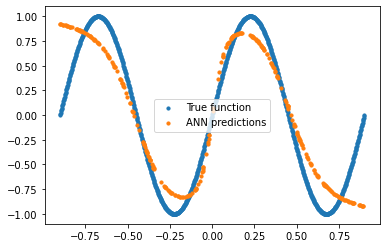

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, label='True function', s=10)
plt.scatter(x_val, y_pred, label='ANN predictions', s=10)
plt.legend()
plt.show()

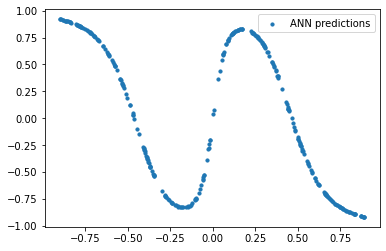

In [ ]:
plt.scatter(x_val, y_pred, label='ANN predictions', s=10)
plt.legend()
plt.show()

# c. Train, validate and test ANN on regression data of a Combined Cycle Power Plant Dataset

In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [84]:
# Load and preprocess the data
data = pd.read_excel("Folds5x2_pp.xlsx")
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [85]:
# Split the dataset
X = data[:, :4]  # Input features
y = data[:, 4:]  # Output variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [86]:
# Define the ANN architecture
input_size = 4
hidden_size = 3
output_size = 1

In [87]:
# Initialize the network's weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [88]:
# Define the loss function
def mape_loss(y_test, y_pred):
  eps = 0.001
  loss = np.mean((abs(y_test - y_pred) * 100) / (abs(y_pred) + eps))
  print(f"Loss : {loss:.4f}")

# Define the loss function
def accuracy(y_test, y_pred):
    threshold = 0.1
    correct_predictions = 0
    
    for i in range(len(y_pred)):
        if abs(y_pred[i] - y_test[i]) <= threshold:
            correct_predictions += 1
            
    accuracy = (correct_predictions / len(y_pred)) * 100
    
    print(f"Accuracy: {accuracy:.4f}%")

In [89]:
# Implement the forward and backward propagation
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - x**2

def forward(X):
    Z1 = np.dot(X, W1) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    return Z1, A1, Z2

def backward(X, y, Z1, A1, Z2):
    m = X.shape[0]
    dZ2 = Z2 - y
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T) * tanh_derivative(A1)
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)
    return dW1, db1, dW2, db2

Epoch 0, Train Cost: 0.003374868102498428, Validation Cost: 0.0035461885515394673
Epoch 5000, Train Cost: 0.0033657821735398386, Validation Cost: 0.0035355349392642175
Epoch 10000, Train Cost: 0.0033575201542444355, Validation Cost: 0.0035260523278637834
Epoch 15000, Train Cost: 0.0033499430956790963, Validation Cost: 0.003517528338829838
Epoch 20000, Train Cost: 0.003342949797758241, Validation Cost: 0.0035098037650962977
Epoch 25000, Train Cost: 0.003336464176852406, Validation Cost: 0.0035027567495859546
Epoch 30000, Train Cost: 0.0033304271659208833, Validation Cost: 0.0034962921313953284
Epoch 35000, Train Cost: 0.0033247914839422913, Validation Cost: 0.0034903341798649895
Epoch 40000, Train Cost: 0.0033195182249761176, Validation Cost: 0.00348482156791931
Epoch 45000, Train Cost: 0.0033145746053158107, Validation Cost: 0.0034797038405391246
Test Cost: 0.003598095582602287
Prediction: [0.84828152], Actual: [0.78701987]

Loss : 13.1484
Accuracy: 92.4242%



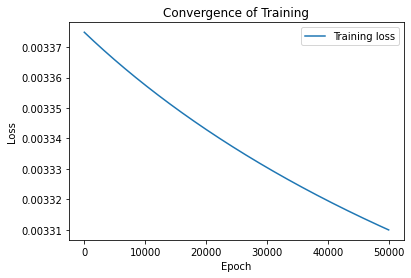

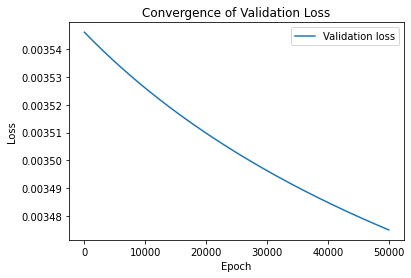

In [96]:
#Train the network using gradient descent
epochs = 50000
learning_rate = 0.01

history = {'train_loss':[], 'val_loss': []}

for epoch in range(epochs):
    # Forward pass
    Z1, A1, Z2 = forward(X_train)
    
    # Compute the cost
    cost = mean_squared_error(y_train, Z2)
    
    # Backward pass
    dW1, db1, dW2, db2 = backward(X_train, y_train, Z1, A1, Z2)
    
    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Evaluate the model on the validation set
    _, _, Z2_val = forward(X_val)
    val_cost = mean_squared_error(y_val, Z2_val)

    # Store the losses in the history dictionary
    history['train_loss'].append(cost)
    history['val_loss'].append(val_cost)

    # Print cost for every 100 epochs
    if epoch % 5000 == 0:
        print(f"Epoch {epoch}, Train Cost: {cost}, Validation Cost: {val_cost}")

# Evaluate the model on the test set
_, _, Z2_test = forward(X_test)
test_cost = mean_squared_error(y_test, Z2_test)
print(f"Test Cost: {test_cost}")

# Make predictions on new data
def predict(X_new):
    _, _, predictions = forward(X_new)
    return predictions

# X_new = X_test.reshape(1, -1)
prediction = predict(X_test)
print(f"Prediction: {prediction[0]}, Actual: {y_test[0]}")
print()

# prediction
mape_loss(y_test, prediction)
accuracy(y_test, prediction)
print()


# Plot the convergence graph
plt.figure()
plt.title('Convergence of Training')
plt.plot(history['train_loss'], label='Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.figure()
plt.title('Convergence of Validation Loss')
plt.plot(history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show()